# HARSH SHARMA

---

## DELIVERABLE #3 STATS AND PUBLIC HEALTH (PART 1)

It is highly recommended to follow this notebook from the starting, because modification of data frames happens at several steps of the notebook. Skipping the contents will either change the result or will not work certain functions.
thanks

---

In [112]:
!pip install jupyterthemes # tried installing themes for jupyter notebook

ERROR: Invalid requirement: '#'


In [356]:
!jt -l #checking available themese

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [83]:
!jt -t grade3 #wasnt success :(

'jt' is not recognized as an internal or external command,
operable program or batch file.


First let's import the libraries we are going to use for this assignment

For some reason seaborn alias sns was not working, so I installed seaborn as shown below. Source: Google

In [31]:
!pip install seaborn

     ------------------------------------ 285.1/285.1 kB 262.5 kB/s eta 0:00:00


In [87]:
!pip install geoPandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\user\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-0lzx3dcg\\fiona_07a6db27ac8e46a49b76f8cc632ffe8a\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-0lzx3dcg\\fiona_07a6db27ac8e46a49b76f8cc632ffe8a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-xq5q_xk1'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-0lzx3dcg\fiona_07a6db27ac8e46a49b76f8cc632ffe8a\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment varia


  Using cached geopandas-0.11.1-py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point 
from geopandas import GeoDataFrame # I was experimenting to draw a map using Lat and Lon, that's why I installed geopandas using anaconda prompt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (5.0, 3.0) #setting figure size in general for the graph I'm using for my visualisation

Below is the familirisation with the dataframe and its importing to the jupyter notebooks

In [90]:
mos_df = pd.read_csv('mosquito_data.csv') # read_csv pulls or reads the data from the directory of the file
mos_df # mos_df is the name that I assigned to the DataFrame

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758


#### There are 3 conditions that are given with this dataset along with the description of column names in the dataset. The 3 condition are as follows:

1. Some trapes are "Satellite traps". These are the traps that are set near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.
2. Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.
3. These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.

In [5]:
mos_df.info() # info() shows us the information we have like seen below for the mosquito data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


From above we can see that except "Lat" and "Lon", every existing column in the dataframe has the same number of non-null values. Also, the value of all the columns (except Lat and Lon) matches the number of rows in the mosquito data frame (that is: 18495 rows)

From above it becomes obvious that we need to either clean the data for Lat and Lon or fill up the NULL values.

Let's see how much data are we missing from the last 2 columns (Lat and Lon)

In [6]:
18495 - 15571 # 2924 values are missing for both the columns

2924

In [7]:
#by this we can find out what different results we can get from the existing dataset, however this will 
#change when data cleaning is done

mos_df.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


---

### Question 1 

In [8]:
# as expected output shows that there are 18495 rows and 13 columns in the dataset, BUT the thing is that 
#there can be duplicated rows and columns in the dataframe which when removed will change the shape of the 
#data frame, I'll do this below in data cleaning

mos_df.shape

(18495, 13)

In [9]:
print(f'Our mos dataframe has {mos_df.shape[0]} rows and {mos_df.shape[1]} columns.')

Our mos dataframe has 18495 rows and 13 columns.


Apparently, as one of the notes given says that whenever the number of mosquitoes exceed 50 at any particular location, a new row is created with number of mosquitos just more than 50. So what needs to be done to the dataframe that we draw right results we need to combine the rows which contain same information except mosquito number.
And when we combine these the shape of the dataset is going to be changed (number of rows is going to be decreased but number of columnns is going to be same in this case)

#### Combination of the rows is done in Part 2 of the assignment


In [10]:
np.max(mos_df['Mosquito number']) #max from numpy extracts maximum number from the data

50

Above function proves that there is/are rows where the maximum "Mosquito Number" is 50.

**Question 4 asks for the duplicate columns and remove them but for data cleaning we need to check the rows too. So for here in Question 1 I'll see for duplicated rows and modify the existing data set.**

Further checking and confirmation is done in que 4 of part 1:Data Wrangling 

#### Checking duplicate data

Now, lets cheque the duplicate data we have in our data frame, first on a row level

In [11]:
#checking total number # of duplicated rows
mos_df.duplicated().sum() 

658

There are apparently 658 duplicate rows in the dataset. What does this represent as a percentage?

In [12]:
#calculating % of duplocated data
mos_df.duplicated().sum()*100/mos_df.shape[0]

3.55771830224385

Approximately 3.557% of the dataset is duplicate on the row-level. Let us investigate further using the index returned.

In [91]:
# lets drop the duplicates and save the result into a new variable
mos2_df = mos_df.drop_duplicates()
mos2_df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [92]:
# Sanity check
mos2_df.duplicated().sum()

0

---

### Question 2: Convert the 'Date' column to have a datetime format.

In [15]:
#dtypes shows us the type we have for columns we have for the dataframe
#here clearly we can see that date has the object datatype
mos2_df.dtypes

Year                 int64
Week                 int64
Address Block       object
Block                int64
Trap                object
Trap type           object
Date                object
Mosquito number      int64
Mosquito ID         object
WNV Present         object
Species             object
Lat                float64
Lon                float64
dtype: object

We see that both numeric and categorical/ string data exists in the mosquito data frame. Int and float both represent the numeric data whereas object represents categorical or string data.

We can see down here that the type of the 'Date' column is object in the dataframe that is available, so we need to change it to DATETIME from OBJECT

Down is the procedure for the change of the type

In [93]:
mos2_df['Date'] = mos2_df['Date'].apply(pd.to_datetime)
display(mos2_df.dtypes)     ##The [ns] means the nano second-based time format that specifies the precision of the DateTime object.

C:\Users\user\AppData\Local\Temp\ipykernel_35960\3516440292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos2_df['Date'] = mos2_df['Date'].apply(pd.to_datetime)


Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

From above, we can see that data type of Date changes to datetime64[ns]. So basically now we have 3 data types in our dataframe, that are, int, float and datetime.

In [94]:
mos2_df.head() #sanity check HARSH: Note why the type changes but the appearnce of the column doesnt change

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


---

---

### Question 3 Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

#### First case or first thought of choosing columns

Lets take 'Block' and 'Mosquito number' be the 2 numeric columns and 'Trap type' and 'Species' be the 2 categorical columns.


I took these specific 4 columns to know more about them. In simple terms, to find out is there any relation between them? 

1. Does specific species have more number of mosquitos associated with them? 
2. What trap was commonly used to identity certain type of species or does trap type depend on the number of mosquitos? 
3. And lastly in which blocks we had more mosquito numbers than anybody else or categorisation of specific specy in blocks??

And most importantly what can we do with the answers that we get from the above questions? Is there any business case value to it or are there any measures like the use of traps that can be answered from the above insights or results??

To answer all this we really need to know the distribution of the all the four columns which is done below.
To add more, distribution is done to see that our data is not concentrated towards one of the side like the particular traps aren't the only ones that were put at a particular place and to catch certain species of mosquitos. 

#### Another thought: 

I could have chosen lat and lon be the two numeric columns and species and trap type be the 2 categorical columns. By this following visualisations or results could have been drawn from them.
1. Which area in the City of Illinois has the specific species
2. What type of trap was used in different areas of the city.
3. What type of trap was used for different species.

#### HS: If I have time do this question again. Make sure which data frame you are using.

### Distribution matters: As far I can understand if all locations were not been tested at the same time, then the distribution and our data would have been different. Records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.

Further information about this in Part2 of the assignment.

#### Drawing visualisation of the distribution by the first case

In [95]:
mos3_df = mos2_df.loc[:, ["Block", "Trap type", "Mosquito number", "Species"]] #.loc is used to extract certain rows or colummns from the dataset
mos3_df.head() #.head() returns first 5 elements of the dataset

,Block,Trap type,Mosquito number,Species
0,100,GRAVID,2,CULEX RESTUANS
1,52,GRAVID,1,CULEX RESTUANS
2,58,GRAVID,2,CULEX RESTUANS
3,39,GRAVID,1,CULEX RESTUANS
4,131,GRAVID,9,CULEX RESTUANS


Lets check what are the data types of this dataframe

In [96]:
#dtypes is used to know the type of the columns
mos3_df.dtypes

Block               int64
Trap type          object
Mosquito number     int64
Species            object
dtype: object

From above we can see that 2 of the columns, that are, block and mosquito number have data stored as 64bit integer forms which is basically numerical data, whereas trap type and species have datatypes as object which is the categorical or string data.

Using visualizations is an important part of understanding patterns that tables and summary statistics cannot portray. There are two main types of visualizations we should always leverage at this stage:

1. Univariate visualizations: one variable at a time
2. Multivariate visualizations: two or more variables at a time

### First let us see the distribution of all the 4 columns selected

#### Categoriacal columns (Block  and Mosquito number)

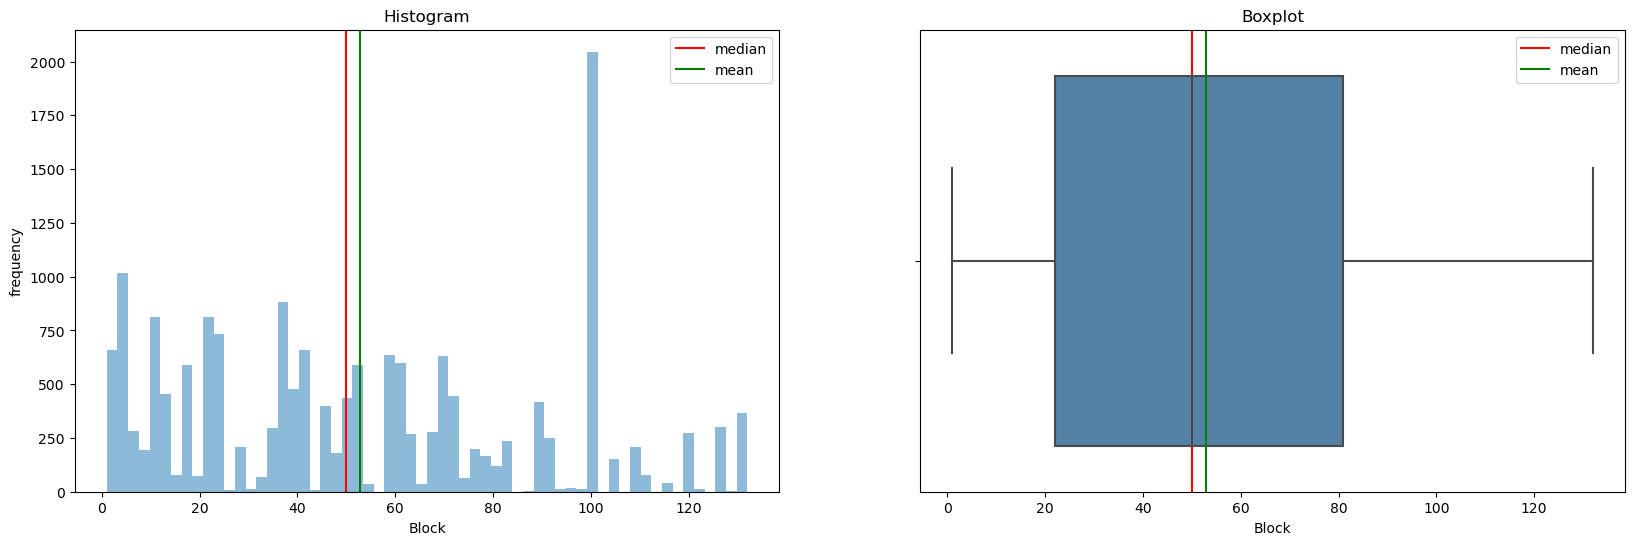

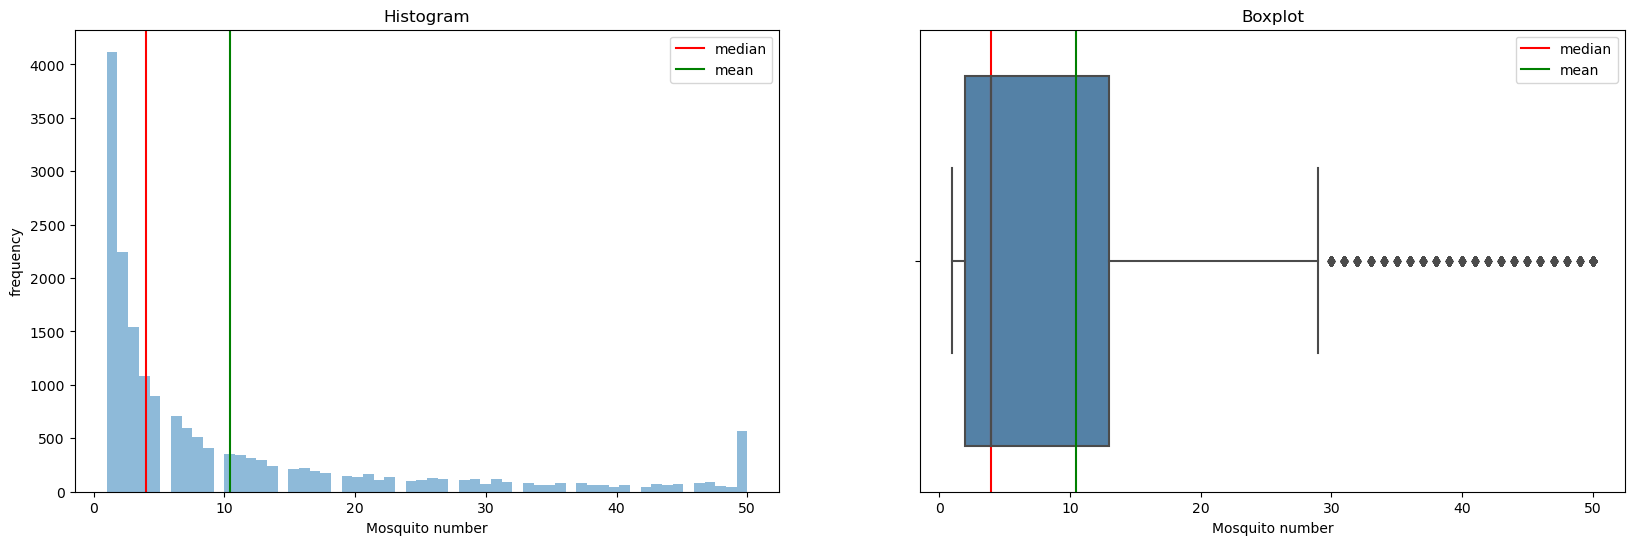

In [99]:
# Use a for loop to generate the plots and use subplots this time

# Visualise the 2 numeric cols using a histogram and boxplot
for col in ['Block','Mosquito number']:
    plt.subplots(1, 2, figsize=(20, 6))

    # Plot out the histogram
    plt.subplot(1, 2, 1)
    plt.hist(mos2_df[col], bins=60, alpha=0.5)
    plt.title('Histogram')
    plt.axvline(mos2_df[col].median(), label='median', color='red')
    plt.axvline(mos2_df[col].mean(), label='mean', color='green')
    plt.legend()
    plt.xlabel(f'{col}')
    plt.ylabel('frequency')

    # Plot the boxplot. We can use the seaborn boxplot code for this.
    plt.subplot(1, 2, 2)
    sns.boxplot(x=mos2_df[col], color="steelblue")
    plt.axvline(mos2_df[col].median(), label='median', color='red')
    plt.axvline(mos2_df[col].mean(), label='mean', color='green')
    plt.legend()
    plt.title('Boxplot')


    plt.show()

1. Blocks are divided uniformly accross the dataset, which means their was not excessive use of particular location in the City of Chicago, which is basically a good thing. Mean and median also are about the same place but a little to the left, that is due to the spike near block 100. There are some cracks in the bars which could be that some of blocks are missing in the data (City officials maybe did not check these blocks)

2. Mosquito number are skewed right as can be seen from both histogram and the boxplot. Lesser number of mosquitoes are caught more frequently than more mosquitoes.

Actually this distribution is gonna change once the rows are added to thier duplicates who have mosquito number is equal to 50. 
#### HS: Draw this distribution again in Part 2


#### Distribution for trap type and species using bar graph (categorical columns)

In [21]:
# using value_counts() on our Species column
print(mos2_df['Species'].value_counts())

CULEX RESTUANS      11387
CULEX PIPIENS        5311
CULEX TERRITANS       917
CULEX SALINARIUS      222
Name: Species, dtype: int64


Since value.counts() outputs a series object, we can get the industry labels by using .index and we can get the frequency counts by using .values.

In [22]:
mos2_df['Species'].value_counts().index

Index(['CULEX RESTUANS', 'CULEX PIPIENS', 'CULEX TERRITANS',
       'CULEX SALINARIUS'],
      dtype='object')

In [23]:
mos2_df['Species'].value_counts().values

array([11387,  5311,   917,   222], dtype=int64)

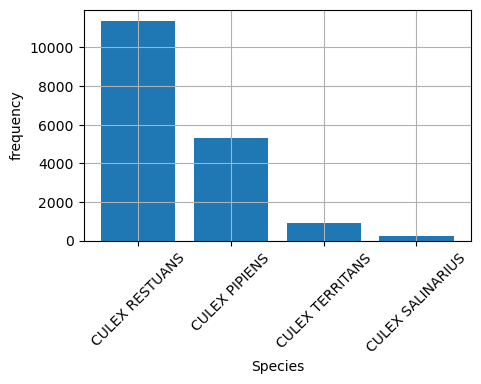

In [24]:
## lets draw a bar graph using the above 2 functions
plt.figure()
plt.bar(mos2_df['Species'].value_counts().index,
        mos2_df['Species'].value_counts().values)
plt.xlabel('Species')
plt.ylabel('frequency')
plt.grid()
plt.xticks(rotation=45)
plt.show()

From the graph we can see that CULEX RESTUANS was the most common species of the mosquitos amongst all. I has almost double occurences compared to CULEX PIPIENS which had only around 5000 found cases. For the rest of the 2 species, that are, CULEX TERRITANS and CULEX SALINARIUS had frequencies 917 and 222 respectively.

#### Distribution of Trap type column

In [25]:
# using value_counts() on our Trap type column
print(mos2_df['Trap type'].value_counts())

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64


In [26]:
mos2_df['Trap type'].value_counts().index

Index(['GRAVID', 'CDC', 'SENTINEL', 'OVI'], dtype='object')

In [27]:
mos2_df['Trap type'].value_counts().values

array([17098,   529,   209,     1], dtype=int64)

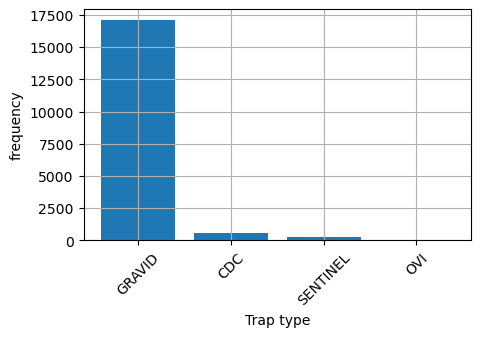

In [28]:
plt.figure()
plt.bar(mos2_df['Trap type'].value_counts().index,
        mos2_df['Trap type'].value_counts().values)
plt.xlabel('Trap type')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Gravid is the most used traps amongst all other traps used amongnst all the traps. As far as distribution is concerned this is not evenly distributed at all. This is because GRAVID was used at near about 17,500 times whereas the others, CDC, SENTINEL, OVI did not even cross 1000 traps. 

It woould be fun to see which traps caught the most number of mosquitos and then draw really "good" results!!

Moreover as the data mentions that there were satellite maps which were also installed to increase survelliance of the mosquitoes. These satellite traps had also trap types out one of the 4 of the available traps. If those are taken into consideration while seeing the distrubution, then it would change distribution obviously. But anyways they are one of the 4 types, its ok with the above distribution only.

More in detail could be found in question 2 of Part3 ;) 

### Question 4: Are there any columns that contain duplicate information? If so, remove the redundant columns.

As we have removed all the duplicated rows from the original dataframe. Let us also be thorough and check that no two columns also contain the same information. To do this, we will take the original dataframe's transpose, and check for duplicates on its rows level

In [29]:
mos2_df.T.duplicated() #.T. does the transpose of the dataset. rows become column and vice versa

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

Looking at the above, since all the result are False so we are confident that none of the columns in the provided data are duplicate / contain the exact same information even though they have different column names.

We can also explore duplicate information using correlations, and check the data content to make sure there isn't duplicated information that isn't an exact copy. When we employ a heatmap on the correlations, we expect to see perfect correlation only on the diagonals.

C:\Users\user\AppData\Local\Temp\ipykernel_35960\2413243115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mos2_df.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0) #.corr is corelation func


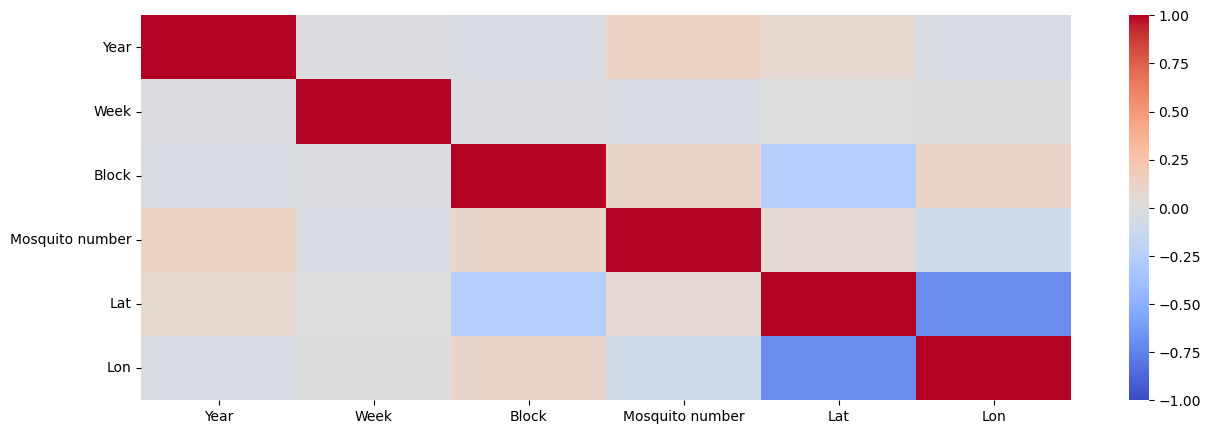

In [30]:
plt.figure(figsize=(15, 5)) #setting fig size
sns.heatmap(mos2_df.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0) #.corr is corelation func
plt.show()

Since everything seems perfectly fine in the dataframe but there are columns which seem like having different data but are having same information.
Let's check and confirm our doubts

In [31]:
mos2_df.head() #peeking in the dataset

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


From the above dataset, it can be seen that 'Block' column has the same number as written in front of 'address block' column. And Mosquito ID is just first 3 letters from 'Species' column last name.

In [100]:
# Apply split using an accessor
# new data frame with split value columns
new = mos2_df["Address Block"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
mos2_df["Block"]= new[0]
 
# making separate last name column from new data frame
mos2_df["Address"]= new[1]
 
# Dropping old Name columns
mos2_df.drop(columns =["Address Block"], inplace = True)
 
# df display
mos2_df

C:\Users\user\AppData\Local\Temp\ipykernel_35960\213608958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos2_df["Block"]= new[0]
C:\Users\user\AppData\Local\Temp\ipykernel_35960\213608958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos2_df["Address"]= new[1]
C:\Users\user\AppData\Local\Temp\ipykernel_35960\213608958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Address
0,2019,39,100XX,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN,W OHARE AIRPORT
1,2019,39,52XX,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE
2,2019,39,58XX,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,N WESTERN AVE
3,2019,39,39XX,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,N SPRINGFIELD AVE
4,2019,39,131XX,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,S BRANDON AVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18489,2013,35,63XX,T155,GRAVID,2013-08-29 00:08:00,3,Pip,positive,CULEX PIPIENS,41.776009,-87.779408,W 64TH ST
18490,2016,36,3XX,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858,W 18TH ST
18491,2007,34,46XX,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403,N MILWAUKEE AVE
18492,2016,30,127XX,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176,S DOTY AVE


In [33]:
mos2_df.head()

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Address
0,2019,39,100XX,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN,W OHARE AIRPORT
1,2019,39,52XX,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE
2,2019,39,58XX,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,N WESTERN AVE
3,2019,39,39XX,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,N SPRINGFIELD AVE
4,2019,39,131XX,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,S BRANDON AVE


Address and block are separated as seen from above. Now let's remove 'Mosquito ID' column

In [101]:
del mos2_df['Mosquito ID']
mos2_df.tail() #sanity check

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Address
18489,2013,35,63XX,T155,GRAVID,2013-08-29 00:08:00,3,positive,CULEX PIPIENS,41.776009,-87.779408,W 64TH ST
18490,2016,36,3XX,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,W 18TH ST
18491,2007,34,46XX,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,N MILWAUKEE AVE
18492,2016,30,127XX,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,S DOTY AVE
18493,2017,33,20XX,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,N DOMINICK ST


Above dataset now does not have any repeated or duplicated rows and columns

These 2 columns were removed form our data set, although, we did not have any duplicated data but these columns contained data that was basically the same information as the other 2 columns. That's why I removed(dropped) them.

### Question 5: Are there any null values in the dataframe? If so, deal with them appropriately.

#### Dealing with missing data
Now we will deal with missing data in the dataset.

In [68]:
# How many values are actually missing?
mos2_df.isna().sum()

Year                  0
Week                  0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
Address               0
dtype: int64

As we expected that Lat and Lon columns should only have NULL values, so is seen above. 2266 values of each are missing in the dataset.

In [36]:
# Percentage of missing values in each column
mos2_df.isna().sum()/mos2_df.shape[0]*100.0 

Year                0.00000
Week                0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
Address             0.00000
dtype: float64

Based on the above information Lat and Lon have almost 13 percent of thier data missing from their dataset. I know 13 percent is a lot of data and I surelly would not like to ignore it. 

Also as the missing is huge, I dont want to get wrong results and wrong recommendations to City of Chicago, Illionis. But for sure, if these 13 percent rows are removed it will create a huge bias in the results.

Moreover, not every column is evenly distributed, so it would definitely be not fair, if these 2 columnns are removed or the rows with NULL values are removed.

Let's start the imputation of NULL values of Lon and Lat column.

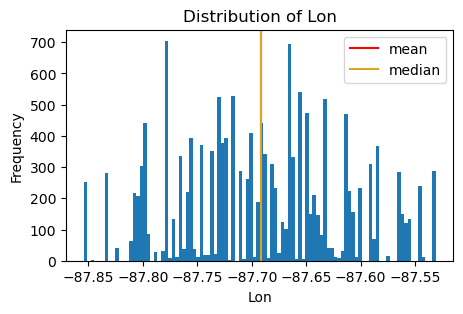

In [37]:
# finding the distribution and mean of Lon column
plt.figure()
plt.hist(mos2_df['Lon'], bins=100)
plt.axvline(mos2_df['Lon'].mean(), label='mean', color='red')
plt.axvline(mos2_df['Lon'].median(), label='median', color='goldenrod')
plt.xlabel('Lon')
plt.ylabel('Frequency')
plt.title('Distribution of Lon')
plt.legend()
plt.show()

#### where is mean??

Lon is equally distributed as observed from above graph and postion of median at the center also says the same interpretation.

So imputing the missing values of the Lon can be substituted with the median of all the longitudes in the dataframe.

In [102]:
mos2_df.loc[:, 'Lon'] = \
    mos2_df['Lon'].fillna(mos2_df['Lon'].median()) ## filling NULL lon values with the median of the known values

C:\Users\user\AppData\Local\Temp\ipykernel_35960\3322082290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos2_df.loc[:, 'Lon'] = \


In [103]:
# Check the result # sanity check
mos2_df['Lon'].isna().sum()

0

Let's do it for the Lat as well

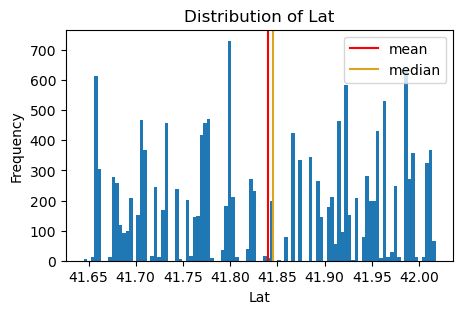

In [104]:
# finding the distribution and mean of Lon column
plt.figure()
plt.hist(mos2_df['Lat'], bins=100)
plt.axvline(mos2_df['Lat'].mean(), label='mean', color='red')
plt.axvline(mos2_df['Lat'].median(), label='median', color='goldenrod')
plt.xlabel('Lat')
plt.ylabel('Frequency')
plt.title('Distribution of Lat')
plt.legend()
plt.show()

From the above it can be seen that Lat are equally distributed accross the whole x-axis, that's why mean and median are at almost same location and are at the centre. Mean seems like to be at the perfect centre and let's impute the NULL values of the latitudes with the mean of the Lat.

In [105]:
mos2_df.loc[:, 'Lat'] = \
    mos2_df['Lat'].fillna(mos2_df['Lat'].mean()) ## filling NULL lat values with the mean of the known values

C:\Users\user\AppData\Local\Temp\ipykernel_35960\2045610760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos2_df.loc[:, 'Lat'] = \


In [106]:
# Check the result # sanity check
mos2_df['Lat'].isna().sum()

0

In [107]:
mos2_df.sample(10) #confirmation

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Address
17707,2007,31,101XX,T138,CDC,2007-08-08 00:08:00,50,positive,CULEX PIPIENS,41.710545,-87.584553,S STONY ISLAND AVE
8285,2012,36,100XX,T904,GRAVID,2012-09-10 00:09:00,19,negative,CULEX PIPIENS,41.839963,-87.691698,W OHARE
11617,2009,39,3XX,T043,GRAVID,2009-10-01 00:10:00,1,negative,CULEX PIPIENS,41.857837,-87.635862,W 18TH ST
14890,2007,29,33XX,T144,GRAVID,2007-08-01 02:08:53,1,negative,CULEX PIPIENS,41.940782,-87.794430,N RUTHERFORD AVE
15875,2018,33,25XX,T046,GRAVID,2018-08-16 00:08:00,8,positive,CULEX RESTUANS,41.892221,-87.691691,W GRAND AVE
17956,2014,33,82XX,T225,GRAVID,2014-08-14 00:08:00,9,positive,CULEX PIPIENS,41.742676,-87.731544,S KOSTNER AVE
8582,2012,31,100XX,T916,GRAVID,2012-08-03 00:08:00,1,negative,CULEX RESTUANS,41.839963,-87.691698,W OHARE AIRPORT
3248,2016,36,11XX,T048,GRAVID,2016-09-09 00:09:00,6,negative,CULEX PIPIENS,41.866915,-87.654919,W ROOSEVELT RD
2009,2018,24,11XX,T049,GRAVID,2018-06-14 00:06:00,3,negative,CULEX RESTUANS,41.896131,-87.656762,W CHICAGO AVE
8859,2012,29,46XX,T003,GRAVID,2012-07-19 00:07:00,30,negative,CULEX RESTUANS,41.965375,-87.758412,N MILWAUKEE AVE


----

----

# Part 2 - Basic EDA

## Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

In [44]:
#Sanity check for the type of the date column, it should be in datetime and not in object 
mos2_df.dtypes

Year                        int64
Week                        int64
Block                      object
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
Address                    object
dtype: object

In [45]:
mos2_df

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Address
0,2019,39,100XX,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.839963,-87.691698,W OHARE AIRPORT
1,2019,39,52XX,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE
2,2019,39,58XX,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,N WESTERN AVE
3,2019,39,39XX,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,N SPRINGFIELD AVE
4,2019,39,131XX,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,S BRANDON AVE
...,...,...,...,...,...,...,...,...,...,...,...,...
18489,2013,35,63XX,T155,GRAVID,2013-08-29 00:08:00,3,positive,CULEX PIPIENS,41.776009,-87.779408,W 64TH ST
18490,2016,36,3XX,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,W 18TH ST
18491,2007,34,46XX,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,N MILWAUKEE AVE
18492,2016,30,127XX,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,S DOTY AVE


Our dataframe has 17837 rows including rows which have mosquito number equal to 50.

In [46]:
## pulling rows where mosquito number is equal to 50
max_df = mos2_df.loc[mos2_df['Mosquito number'] == 50]
max_df

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Address
352,2019,33,70XX,T151,GRAVID,2019-08-15 00:08:00,50,positive,CULEX RESTUANS,41.916135,-87.801093,W ARMITAGE AVE
663,2019,28,52XX,T114,GRAVID,2019-07-11 00:07:00,50,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE
802,2019,26,52XX,T114,GRAVID,2019-06-27 00:06:00,50,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE
892,2019,25,41XX,T002,GRAVID,2019-06-20 00:06:00,50,negative,CULEX RESTUANS,41.956299,-87.797517,N OAK PARK AVE
902,2019,25,62XX,T236,GRAVID,2019-06-20 00:06:00,50,negative,CULEX RESTUANS,41.994966,-87.770837,N MCCLELLAN AVE
...,...,...,...,...,...,...,...,...,...,...,...,...
18455,2007,33,22XX,T087,GRAVID,2007-08-21 00:08:00,50,positive,CULEX PIPIENS,41.688201,-87.676870,W 113TH ST
18462,2016,31,58XX,T027,GRAVID,2016-08-04 00:08:00,50,positive,CULEX RESTUANS,41.986328,-87.728373,N PULASKI RD
18464,2007,30,70XX,T008,GRAVID,2007-08-01 02:08:26,50,positive,CULEX PIPIENS,42.008001,-87.778228,N MOSELLE AVE
18472,2014,33,41XX,T002,GRAVID,2014-08-14 00:08:00,50,positive,CULEX RESTUANS,41.956300,-87.797514,N OAK PARK AVE


From above we can see that there 571 rows or cases where the total number of mosquitos found is either 50 or more than that.

Now let's see how can we add this to our dataframe.

In [108]:
## grouping by every column in the dataset except Mosquito number

mos2_df = mos2_df.groupby(['Year', 'Week', 'Block', 'Trap', 'Trap type', 'Date', 'WNV Present'
                       , 'Species', 'Lat', 'Lon', 'Address'], as_index=False).sum()
mos2_df

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
0,2007,21,119XX,T091,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.677032,-87.644465,S PEORIA ST,1
1,2007,21,11XX,T048,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.866915,-87.654919,W ROOSEVELT RD,2
2,2007,21,11XX,T049,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.896131,-87.656762,W CHICAGO AVE,1
3,2007,21,15XX,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,W WEBSTER AVE,2
4,2007,21,15XX,T153,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.909340,-87.761078,N LONG AVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17386,2019,39,82XX,T225,GRAVID,2019-09-26 00:09:00,negative,CULEX TERRITANS,41.742670,-87.731550,S KOSTNER AVE,1
17387,2019,39,89XX,T099,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS,41.733188,-87.555629,S MUSKEGON AVE,3
17388,2019,39,89XX,T159,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS,41.731447,-87.649722,S CARPENTER ST,3
17389,2019,39,91XX,T009,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS,41.988586,-87.854473,W HIGGINS RD,4


In [48]:
17391 + 571 #checking if it results to right number of rows

17962

17962 != 17837, maybe this is because that we have cases when we have exact mosquito number = 50 for that particular row

In [49]:
hello_df = mos2_df.loc[mos2_df['Mosquito number'] == 50]
hello_df #sanity check to see if now also I have rows where I have mosquito number is exact 50.

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
301,2007,28,101XX,T138,CDC,2007-08-01 02:08:08,negative,CULEX RESTUANS,41.710542,-87.584559,S STONY ISLAND AVE,50
385,2007,28,4XX,T135,CDC,2007-08-01 02:08:34,negative,CULEX PIPIENS,41.839963,-87.691698,W 127TH,50
432,2007,29,101XX,T138,CDC,2007-07-19 00:07:00,negative,CULEX PIPIENS,41.710542,-87.584559,S STONY ISLAND AVE,50
460,2007,29,127XX,T115,CDC,2007-07-25 00:07:00,positive,CULEX PIPIENS,41.662387,-87.590180,S DOTY AVE,50
461,2007,29,127XX,T115,CDC,2007-07-25 00:07:00,positive,CULEX PIPIENS,41.662391,-87.590179,S DOTY AVE,50
...,...,...,...,...,...,...,...,...,...,...,...,...
15940,2018,33,25XX,T046B,SENTINEL,2018-08-16 00:08:00,positive,CULEX RESTUANS,41.891460,-87.689759,W GRAND AVE,50
16198,2018,38,25XX,T046B,SENTINEL,2018-09-20 00:09:00,negative,CULEX RESTUANS,41.891455,-87.689763,W GRAND AVE,50
17041,2019,33,70XX,T151,GRAVID,2019-08-15 00:08:00,positive,CULEX RESTUANS,41.916135,-87.801093,W ARMITAGE AVE,50
17042,2019,33,70XX,T151,GRAVID,2019-08-15 00:08:00,positive,CULEX RESTUANS,41.916142,-87.801089,W ARMITAGE AVE,50


In [50]:
17962 - 306 #don't know why it still doesnt match to 17837.

17656

In [50]:
# be very careful while running above functions. They have to be run in a sequence.
mos2_df.shape #this is the shape of the dataframe after cleaning

(17391, 12)

#### mos2_df now has the final version. At this point nothing needs to be cleaned (added or deleted)

### Lets start working on date versus mosquito number

In [53]:
mos2_df.head()

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
0,2007,21,119XX,T091,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.677032,-87.644465,S PEORIA ST,1
1,2007,21,11XX,T048,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.866915,-87.654919,W ROOSEVELT RD,2
2,2007,21,11XX,T049,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.896131,-87.656762,W CHICAGO AVE,1
3,2007,21,15XX,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,W WEBSTER AVE,2
4,2007,21,15XX,T153,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.909340,-87.761078,N LONG AVE,1


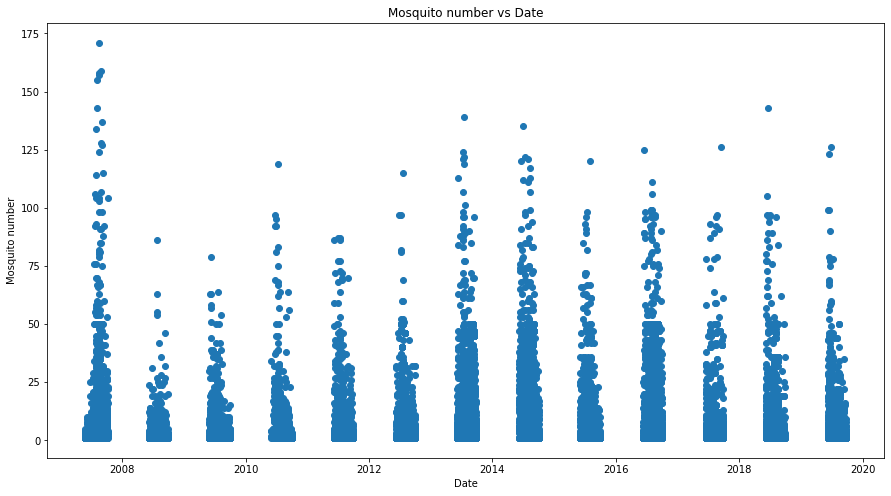

In [88]:
plt.figure(figsize=(15, 8))
plt.scatter(mos2_df['Date'], mos2_df['Mosquito number'])
plt.xlabel('Date')
plt.ylabel('Mosquito number')
plt.title('Mosquito number vs Date')
plt.show()

In [59]:
hey_df = mos2_df.loc[mos2_df['Mosquito number'] >= 50]
hey_df ## just having a sanity check if rows were added while doing groupby of all colunms
######### now I'm curious how did the officials entered the data that had mosquito number greater than 100
## for eg- If there were 107 mosquitoes found, then would they have made 2 rows with mosquito number equal to 50
## and the third row with mosquito number = 7 
# Seriosly don't know how did groupby worked over here?? How come some rows have mosquito number > 100?????

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
298,2007,28,101XX,T138,CDC,2007-07-18 00:07:00,negative,CULEX RESTUANS,41.710542,-87.584559,S STONY ISLAND AVE,76
300,2007,28,101XX,T138,CDC,2007-08-01 02:08:08,negative,CULEX PIPIENS,41.710542,-87.584559,S STONY ISLAND AVE,76
301,2007,28,101XX,T138,CDC,2007-08-01 02:08:08,negative,CULEX RESTUANS,41.710542,-87.584559,S STONY ISLAND AVE,50
321,2007,28,127XX,T115,CDC,2007-08-01 02:08:08,negative,CULEX PIPIENS,41.662387,-87.590180,S DOTY AVE,93
322,2007,28,127XX,T115,CDC,2007-08-01 02:08:08,negative,CULEX RESTUANS,41.662387,-87.590180,S DOTY AVE,114
...,...,...,...,...,...,...,...,...,...,...,...,...
16528,2019,26,52XX,T114,GRAVID,2019-06-27 00:06:00,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE,126
16672,2019,28,52XX,T114,GRAVID,2019-07-11 00:07:00,negative,CULEX RESTUANS,41.798211,-87.736925,S KOLMAR AVE,78
17041,2019,33,70XX,T151,GRAVID,2019-08-15 00:08:00,positive,CULEX RESTUANS,41.916135,-87.801093,W ARMITAGE AVE,50
17042,2019,33,70XX,T151,GRAVID,2019-08-15 00:08:00,positive,CULEX RESTUANS,41.916142,-87.801089,W ARMITAGE AVE,50


C:\Users\user\AppData\Local\Temp\ipykernel_35960\2538045406.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=mos2_df['Date'], y=mos2_df['Mosquito number'], shade=True, thresh=0.05)


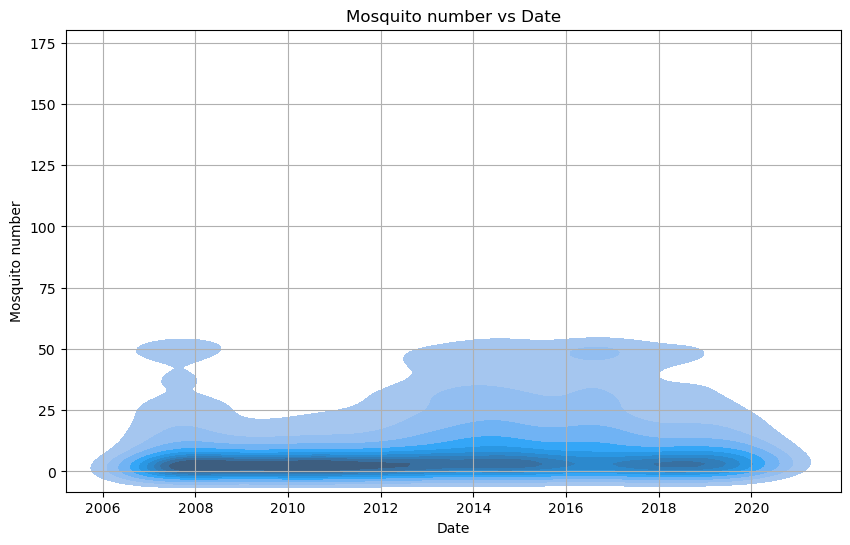

In [110]:
## when drawing this graph dont know why mosquito number is less than 75, whereas I just checked that they exceed 100 
## some cases
## please give FEEDBACK on this

plt.figure(figsize=(10, 6))
sns.kdeplot(x=mos2_df['Date'], y=mos2_df['Mosquito number'], shade=True, thresh=0.05)
plt.xlabel('Date')
plt.ylabel('Mosquito number')
plt.title('Mosquito number vs Date')
plt.grid()
plt.show()

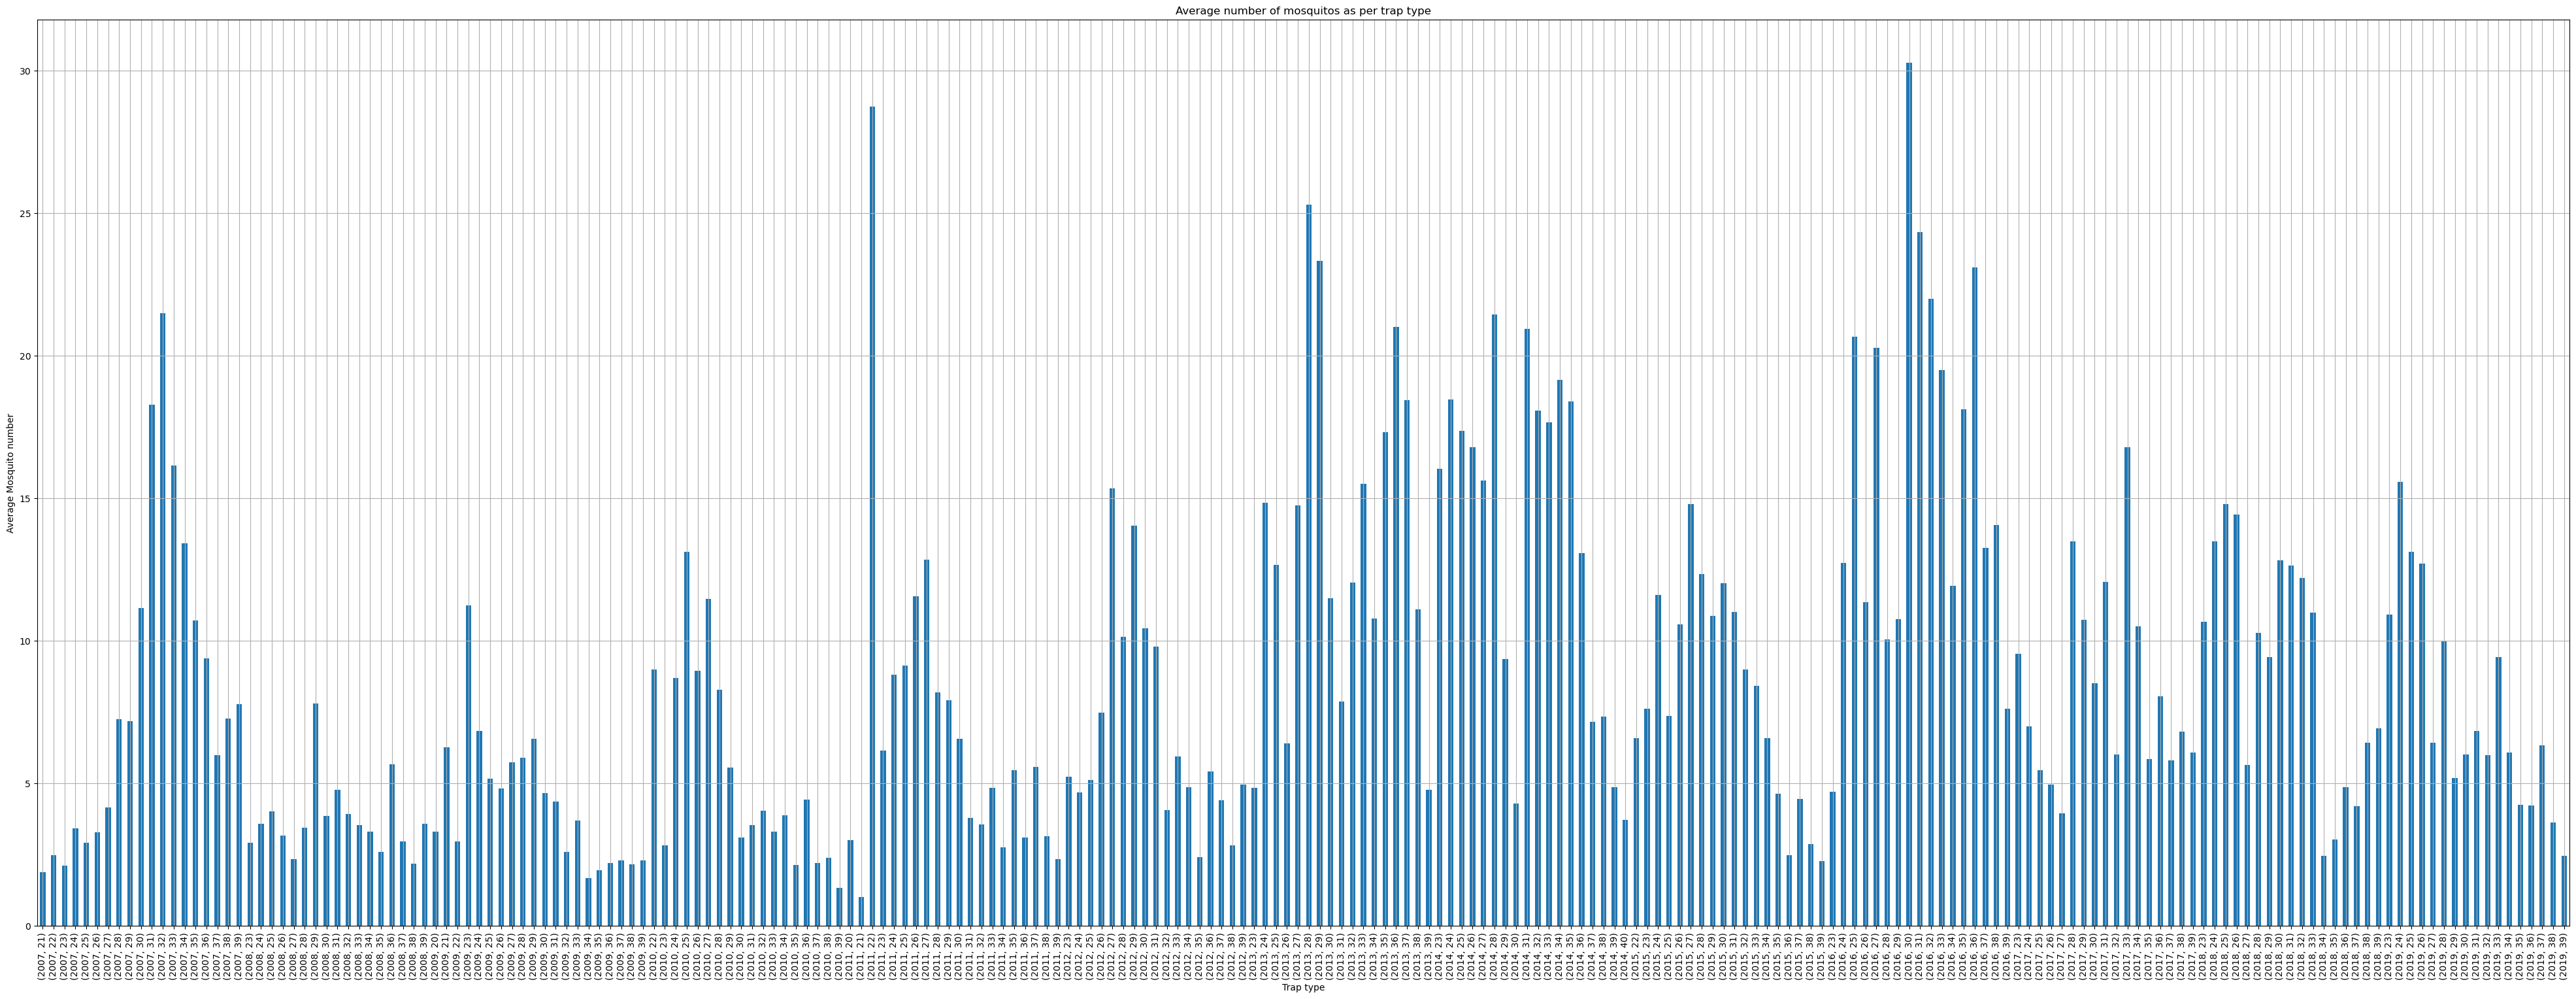

In [84]:
## function for visualising average of number of mosquitos grouped by week and year

plt.figure(figsize=(50, 18))
mos2_df.groupby(['Year', 'Week'])['Mosquito number'].mean().plot(kind='bar')
plt.xlabel('Trap type')
plt.ylabel('Average Mosquito number') 
plt.title('Average number of mosquitos as per trap type')
plt.grid()
plt.show()

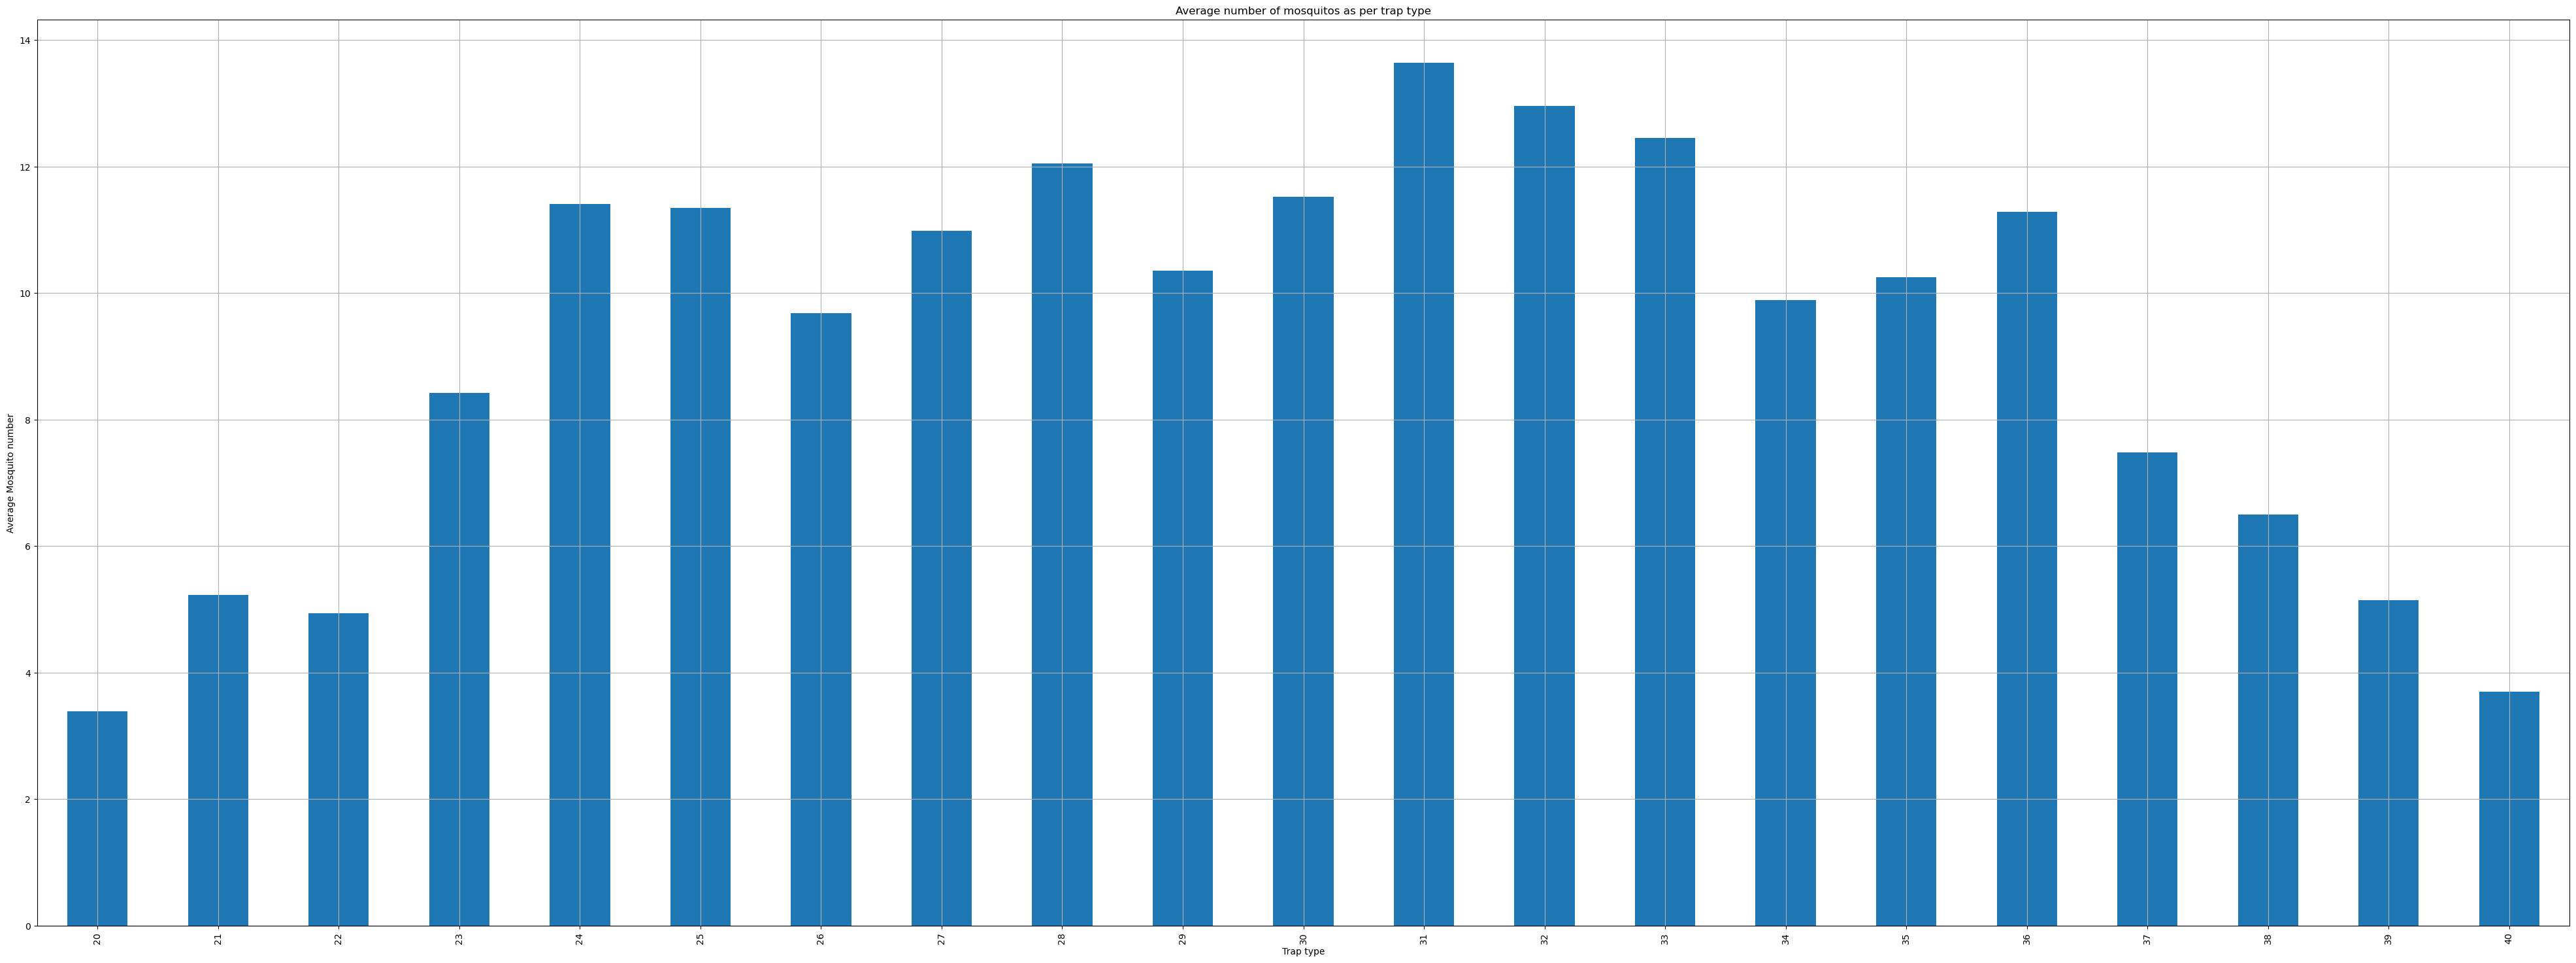

In [111]:
plt.figure(figsize=(50, 18))
mos2_df.groupby( 'Week')['Mosquito number'].mean().plot(kind='bar')
plt.xlabel('Trap type')
plt.ylabel('Average Mosquito number') 
plt.title('Average number of mosquitos as per trap type')
plt.grid()
plt.show()

From above visulisation, following results can be drawn out:
1. Comparing date wise with the number of mosquitos, before the year 2008, there were a lot of mosquitoes and so is their average. Average is max (>20) in week 27 for year 2007 before 2008.
2. Average number of mosquites have steady bars till 2010. After year 2010 average number of mosquitos start on increasing.
3. Numbers of mosquitos increase in middle part of the year (summers).
4. 2013 and 2014 were the most horrible years seeing the average number of mosquitos.
5. Number of mosquitoes and average decreased surprisingly, but 2016 broke the records of 2013 and 2016.
6. However, after 2016 there had been a steady, low average compared to previous 3-4 years.

---

---

# Part 3 - Advanced EDA

### Question 1: Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

In [61]:
mos2_df.head() #peeking in the dataset

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
0,2007,21,119XX,T091,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.677032,-87.644465,S PEORIA ST,1
1,2007,21,11XX,T048,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.866915,-87.654919,W ROOSEVELT RD,2
2,2007,21,11XX,T049,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.896131,-87.656762,W CHICAGO AVE,1
3,2007,21,15XX,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,W WEBSTER AVE,2
4,2007,21,15XX,T153,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.909340,-87.761078,N LONG AVE,1


In the above question we have to basically find the relationship between WNV present and Species columns and draw appropriate visuals.

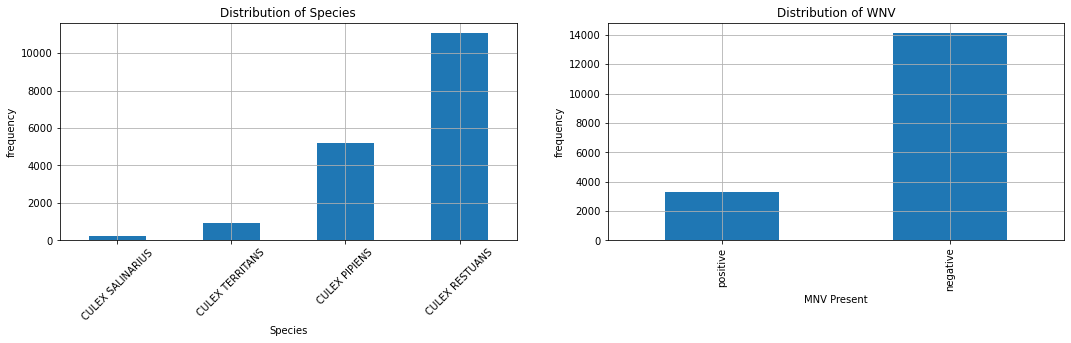

In [62]:
#creating subplot for distribution of WNV column and Species column
plt.subplots(1, 2, figsize=(18, 4))

plt.subplot(1, 2, 1)
#for species
mos2_df['Species'].value_counts().sort_values().plot(kind='bar') #plot(kind='bar') used to creating bar graph
plt.ylabel('frequency')
plt.xlabel('Species')
plt.title('Distribution of Species')
plt.xticks(rotation=45) #for rotating x axis
plt.grid() #for injecting grid in the graph


plt.subplot(1, 2, 2)
#for WNV present
mos2_df['WNV Present'].value_counts().sort_values().plot(kind='bar')
plt.ylabel('frequency')
plt.xlabel('MNV Present')
plt.title('Distribution of WNV')
plt.grid()


plt.show()

In [63]:
mos2_df['Species'].value_counts().values

array([11063,  5192,   914,   222], dtype=int64)

In [64]:
mos2_df['WNV Present'].value_counts().values

array([14108,  3283], dtype=int64)

In [65]:
3283*4 #doing this cal for comparison

13132

From above it can be seen that CULEX RESTUANS species is the most common amongst all the viruses we have. It's occurence is almost double of the CULEX PIPIENS which occurs for 5192 times. CULEX SALINARIUS is at the bottom of the graph with almost frequency of 200 times. CULEX TERRITANS grabs the third spot from top with less than 1000 occurences.

Also, it can be resulted out that the occurence of WNV virus to be postive in any of the 4 species is less than even one fourth of the chances of being negative in the sample taken.

#### Knowing about the distribution is necessary before results should be drawn because if distribution is very skewed then we could have biased results

### STATEMENT : I think it's not a good practice to update our dataset everytime, instead rename the updated dataset. By this mistakes are avoided. By this time I've come so far, other wise I would have changed it.

#### let's make visualisations of Species vs WNV present

In [66]:
## grouping by the columns
a_df = mos2_df.groupby(['WNV Present','Species']).size()
print(a_df)

WNV Present  Species         
negative     CULEX PIPIENS       3972
             CULEX RESTUANS      9021
             CULEX SALINARIUS     215
             CULEX TERRITANS      900
positive     CULEX PIPIENS       1220
             CULEX RESTUANS      2042
             CULEX SALINARIUS       7
             CULEX TERRITANS       14
dtype: int64


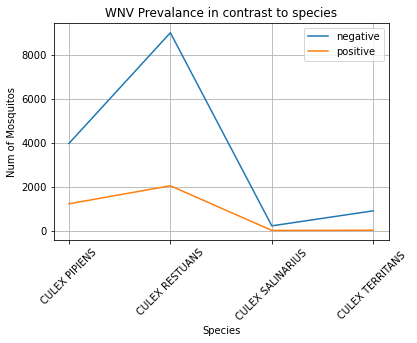

In [68]:
#making a line graph using the values from the above data frame
# I could have done much better in this case (FEEDBACK)

plt.figure()
plt.plot(['CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS '], [3972, 9021, 215, 900], label='negative')
plt.plot(['CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS '], [1220, 2042, 7, 14], label='positive')
plt.xticks(rotation=45)
plt.grid()
plt.legend() ## used for putting label for the differentiation of the lines
plt.xlabel('Species')
plt.ylabel('Num of Mosquitos')
plt.title('WNV Prevalance in contrast to species')
plt.show()

#### Findings from the above graph

1. From above it can be seen that number of negative cases was greater than positive ones in each of the species of the mosquitos. 
2. However, CULEX SALINA had almost same chances of WNV presence and absence
3. Most popular species CULEX RESTUANS has more than 8000 negative cases which is more than 4 times the positive ones.
4. CULEX TERRITANS and CULEX SALINARIUS have just 14 and 7 presence of WNV.
5. Also presence of WNV in case of CULEX pipiens is approximately half of the negative ones of WNV.

---

### Question2: Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

In [215]:
mos2_df.sample(50) ## just for reference

,Year,Week,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Address
3909,2016,28,58XX,T028B,SENTINEL,2016-07-14 00:07:00,1,negative,CULEX RESTUANS,41.987470,-87.689423,N WESTERN AVE
8065,2013,23,4XX,T135,GRAVID,2013-06-07 00:06:00,9,negative,CULEX RESTUANS,NaN,NaN,W 127TH
2911,2017,25,9XX,T226,GRAVID,2017-06-22 00:06:00,1,negative,CULEX RESTUANS,41.794366,-87.648925,W GARFIELD BLVD
11017,2010,30,100XX,T913,GRAVID,2010-07-30 00:07:00,1,negative,CULEX PIPIENS,NaN,NaN,W OHARE AIRPORT
7618,2013,30,41XX,T002,GRAVID,2013-07-25 00:07:00,21,negative,CULEX RESTUANS,41.956299,-87.797517,N OAK PARK AVE
3929,2016,27,24XX,T128,GRAVID,2016-07-08 00:07:00,4,negative,CULEX TERRITANS,41.704687,-87.564236,E 105TH ST
10270,2011,23,25XX,T152,GRAVID,2011-06-10 00:06:00,1,negative,CULEX TERRITANS,41.845715,-87.715899,S MILLARD AVE
8697,2012,30,81XX,T068,GRAVID,2012-07-27 00:07:00,7,negative,CULEX RESTUANS,NaN,NaN,S ASHLAND
14274,2007,34,80XX,T072,GRAVID,2007-08-24 00:08:00,1,negative,CULEX TERRITANS,41.746364,-87.702445,S KEDZIE AVE
9892,2011,29,11XX,T048,GRAVID,2011-07-25 00:07:00,12,negative,CULEX RESTUANS,41.866915,-87.654919,W ROOSEVELT RD


As mentioned with the given data that satellite traps were put with in (usually 6 blocks) of the actual trap to increase the surveillance.

Let's have a look how many satellite traps were installed..

In [69]:
harsh_df = mos2_df[['Trap']] ## just peeking into the trap column
harsh_df

,Trap
0,T091
1,T048
2,T049
3,T045
4,T153
...,...
17386,T225
17387,T099
17388,T159
17389,T009


In [71]:
## calling a function to indentify rows which have satellite traps, basically string lenth = 5

mos2_df['Trap'] = mos2_df['Trap'].astype('str') ## here its obvious trap has type string
satellite = (mos2_df['Trap'].str.len() == 5) ##str.len calls string with particular lenght
harsh_df = mos2_df.loc[satellite]
harsh_df

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
2027,2008,23,22XX,T054B,GRAVID,2008-06-11 00:06:00,negative,CULEX RESTUANS,41.922064,-87.632233,N CANNON DR,2
2114,2008,25,22XX,T054B,GRAVID,2008-06-24 00:06:00,negative,CULEX RESTUANS,41.922064,-87.632233,N CANNON DR,4
2262,2008,28,22XX,T054B,GRAVID,2008-07-11 00:07:00,negative,CULEX RESTUANS,41.922064,-87.632233,N CANNON DR,6
2325,2008,29,22XX,T054B,GRAVID,2008-07-23 00:07:00,negative,CULEX PIPIENS,41.922064,-87.632233,N CANNON DR,3
2326,2008,29,22XX,T054B,GRAVID,2008-07-23 00:07:00,negative,CULEX RESTUANS,41.922064,-87.632233,N CANNON DR,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17322,2019,38,25XX,T046B,SENTINEL,2019-09-19 00:09:00,negative,CULEX RESTUANS,41.891455,-87.689763,W GRAND AVE,16
17356,2019,39,1XX,T030B,SENTINEL,2019-09-26 00:09:00,negative,CULEX RESTUANS,41.883711,-87.716092,N CENTRAL PARK DR,4
17358,2019,39,21XX,T054C,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS,41.921777,-87.632140,N CANNON DR,2
17359,2019,39,22XX,T054A,GRAVID,2019-09-26 00:09:00,negative,CULEX TERRITANS,41.922737,-87.632450,N CANNON DR,1


From above it can be seen that there are total 586 rows which means that we have total number of 586 satellites put into affect in City of Chicago in different blocks. # I named the above datafame as harsh_df.



Now lets draw some insights(visualisations) for the distribution of satellite traps, their types and the distance or block in which they were placed.

In [72]:
harsh_df['Trap type'].value_counts().values #function used to know total number of occurences of different type of 
                                            ## categories in a particular column

array([376, 196], dtype=int64)

In [73]:
harsh_df['Trap type'].value_counts().index #to know categories

Index(['GRAVID', 'SENTINEL'], dtype='object')

From above we can see that only two type trap types were installed that are, GRAVID and SENTINEL 

Now lets figure out how many mosquitos were caught by satellite traps and then compare these numbers with the mosquitos caught by simple traps.

First I should make a dataset which excludes satellite trap types

In [77]:
## calling a function to indentify rows which have satellite traps, basically string lenth = 4

mos2_df['Trap'] = mos2_df['Trap'].astype('str')
notsatellite = (mos2_df['Trap'].str.len() == 4) 
sharma_df = mos2_df.loc[notsatellite]
sharma_df.head()

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number
0,2007,21,119XX,T091,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.677032,-87.644465,S PEORIA ST,1
1,2007,21,11XX,T048,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.866915,-87.654919,W ROOSEVELT RD,2
2,2007,21,11XX,T049,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.896131,-87.656762,W CHICAGO AVE,1
3,2007,21,15XX,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,W WEBSTER AVE,2
4,2007,21,15XX,T153,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.909340,-87.761078,N LONG AVE,1


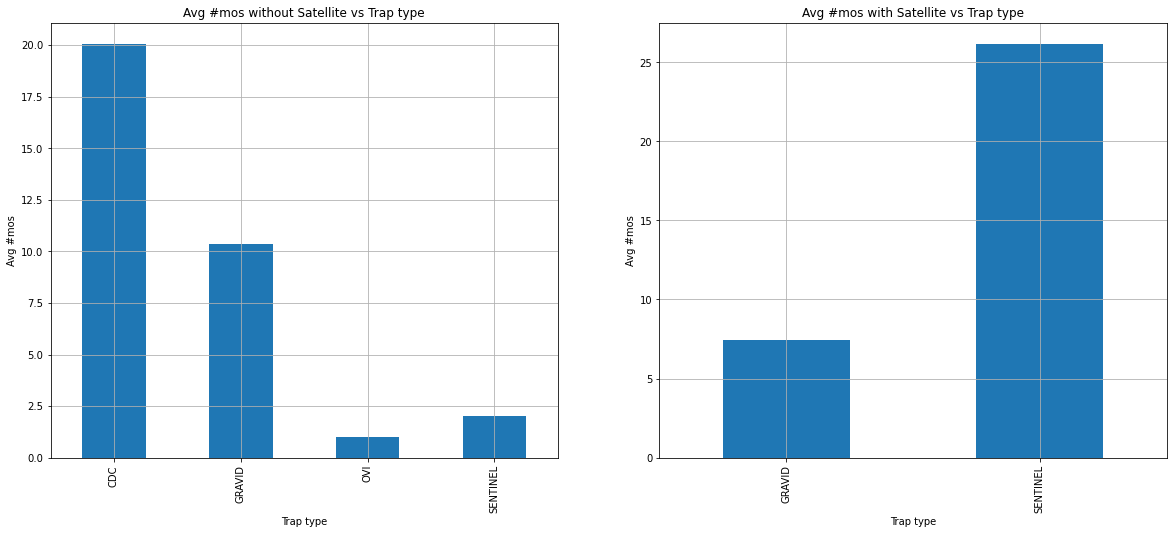

In [78]:
## making a sublot to make 2 bar graphs differenting average num of mosquotoes caught
## satellite versus non-satellite

plt.subplots(1, 2, figsize=(20, 8))

plt.subplot(1, 2, 1)
sharma_df.groupby('Trap type')['Mosquito number'].mean().plot(kind='bar')
plt.title('Avg #mos without Satellite vs Trap type') #to put title
plt.xlabel('Trap type')
plt.ylabel('Avg #mos')
plt.grid()

    
plt.subplot(1, 2, 2)
harsh_df.groupby('Trap type')['Mosquito number'].mean().plot(kind='bar')
plt.title('Avg #mos with Satellite vs Trap type')
plt.xlabel('Trap type')
plt.ylabel('Avg #mos')
plt.grid()


plt.show()

Now I can draw some results that what kind of trap was more successful. Did Satellite trap do their job or not?

1. From above graphs it can be seen that satellite traps were not used in case of OVI and CDC, only CENTINEL and GRAVID as satellite traps.
2. Satellite trap for SENTINEL had phenomenal job in capturing mosquitoes compared to non-satellite ones. On average more than 25 mosquitoes were caught in ssatellite traps where just below 3 in the other case.
3. Satellite GRAVID trap had opposite behavior to that of satellite SENTINEL. It had only 7.5 average number of mosquitos caught with satellite whereas more than 10 without using satellite.
4. CDC trap is the top second successful trap after satellite SENTINEL trap. It caught approximately 20 average number of mosquitoes. I think City offficials knew that, that's why they didnt install satellite ones in this case.
5. OVI trap is least performing with less than 2.5 average mosquitoes in it's bag.

#### HS: learn how to combine the axis for the above graphs?

#### Below is the graph for the Avg. number of mosquites versus the trap type IRRESPECTIVE of the fact that 'Trap type' is satellite or not.

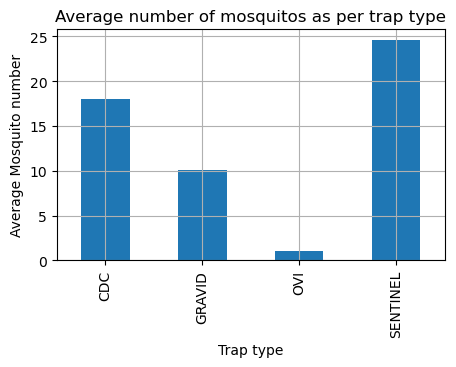

In [74]:
mos2_df.groupby('Trap type')['Mosquito number'].mean().plot(kind='bar')
plt.xlabel('Trap type')
plt.ylabel('Average Mosquito number') 
plt.title('Average number of mosquitos as per trap type')
plt.grid()
plt.show()

1. As expected, looking at the graph SENTINEL is top performing (>25 avg. #mos) and has more than double mosquitoes in its trap compared to GRAVID.
2. Then comes CDC trap and at bottom OVI with 20 and 1 average number of mosquitoes in their trap.

---

 #### Notes: 
Should the City of Chicago change the decision putting satellite traps or should they have increase the number of specific type of trap?? Also, which trap type captured most mosquitos?? I can put all this information in my report/ summary.


It would be very interesting to know in which locations or blocks satellite tarps were installed using the block column. Word "usually" is used to define the location of the satellite trap. I'll have to confirm what is the distance between satellite trap and their combiming (similar trap). Then one more result could be drawn with this information that was the distance the City chose was perfect or they could have improved.

--- 

### Question 3: Using an appropriate visual, come up with an additional insight of your choice.

### Lat-Lon v/s  Species 

I'm trying to plot 4 types of species on a map created by latitudes and longitudes. This will help to recognise were the specific specy found in a particular area or there is no relation between them. This could be a huge help for the City of Chicago.

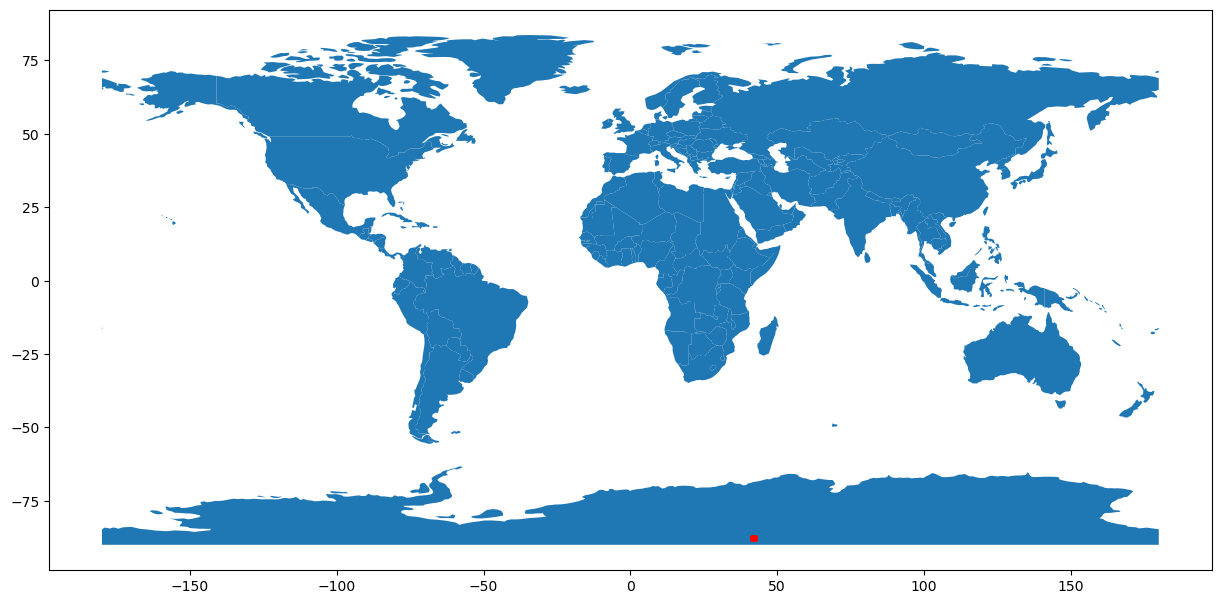

In [52]:
geometry = [Point(xy) for xy in zip(mos2_df['Lat'], mos2_df['Lon'])]
gdf = GeoDataFrame(mos2_df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

How come there is only one red spot on the map. I followed each step on the google very carefully.

Anyways lets try to draw the same visuals and try to get same results on a scatter plot.

In [57]:
mos2_df.head()

,Year,Week,Block,Trap,Trap type,Date,WNV Present,Species,Lat,Lon,Address,Mosquito number,geometry
0,2007,21,119XX,T091,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.677032,-87.644465,S PEORIA ST,1,POINT (41.67703 -87.64447)
1,2007,21,11XX,T048,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.866915,-87.654919,W ROOSEVELT RD,2,POINT (41.86692 -87.65492)
2,2007,21,11XX,T049,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.896131,-87.656762,W CHICAGO AVE,1,POINT (41.89613 -87.65676)
3,2007,21,15XX,T045,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.921705,-87.666963,W WEBSTER AVE,2,POINT (41.92170 -87.66696)
4,2007,21,15XX,T153,GRAVID,2007-05-29 00:05:00,negative,CULEX RESTUANS,41.909340,-87.761078,N LONG AVE,1,POINT (41.90934 -87.76108)


In [60]:
mos4_df = mos2_df.loc[:, ["Lat", "Lon", "Species"]]
mos4_df

,Lat,Lon,Species
0,41.677032,-87.644465,CULEX RESTUANS
1,41.866915,-87.654919,CULEX RESTUANS
2,41.896131,-87.656762,CULEX RESTUANS
3,41.921705,-87.666963,CULEX RESTUANS
4,41.909340,-87.761078,CULEX RESTUANS
...,...,...,...
17386,41.742670,-87.731550,CULEX TERRITANS
17387,41.733188,-87.555629,CULEX RESTUANS
17388,41.731447,-87.649722,CULEX RESTUANS
17389,41.988586,-87.854473,CULEX RESTUANS


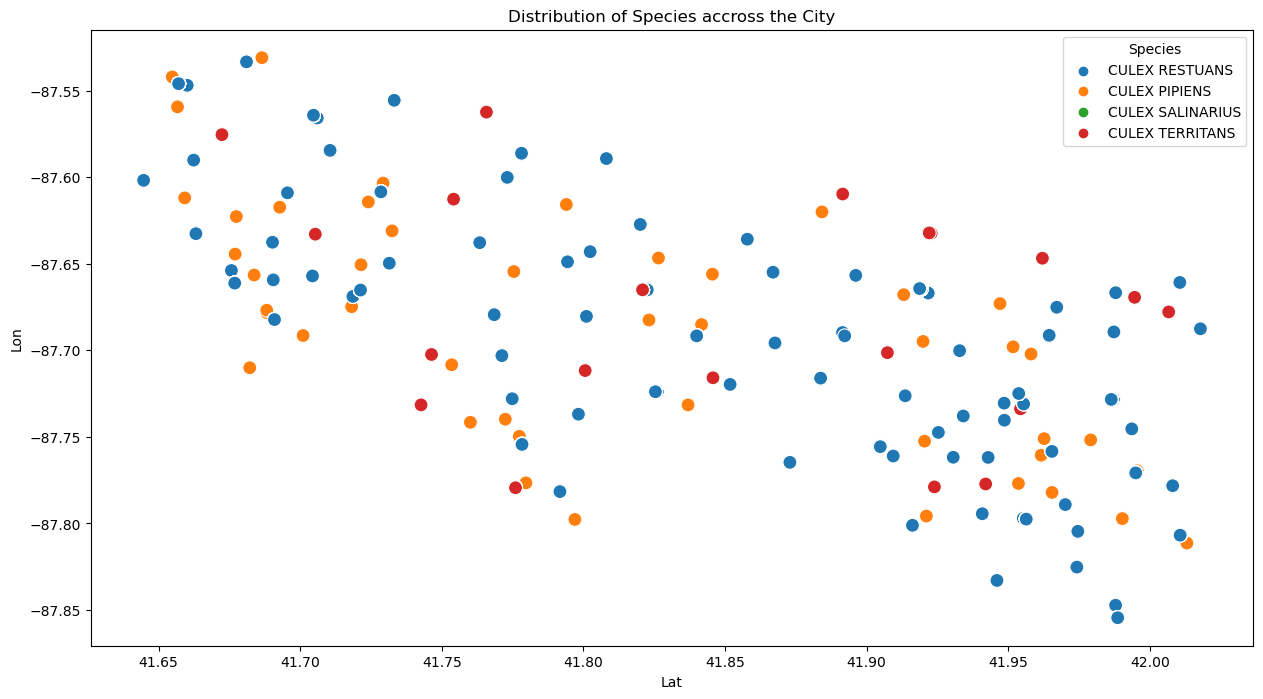

In [65]:
## Spreading Species accross lat and lon
plt.figure(figsize=(15, 8))
ax=sns.scatterplot(x='Lat',y='Lon',hue='Species', s = 100, data=mos4_df)
plt.title('Distribution of Species accross the City')
plt.show()

Nothing much can be drawn from the above visual. Each mosquito spesies is scattered accross the whole area. However, density of the CULEX RESTUANS species increase towards east side of the city. Seems like east of Chicago city is more infectious compared to west.

At this point, it feels like there was no use of Lon and Lat in our mosquito data. So maybe it's a good idea to drop these 2 columns while data wrangling and cleaning.

----

# SUMMARY AND REPORT

### INTRODUCTION

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them. The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city. Total 18495 samples were taken along between a 13 year period. There were total of 4 types of species of mosquitos, that were, CULEX RESTUANS, CULEX PIPIENS, CULEX TERRITANS and CULEX SALINARIUS. These species were found at different locations of the city and different types of traps were used at these locations to count the number of mosquitos found. Out of these mosquites, officials then figured out which mosquitos had WNV or not. Analysis has been done to figure out what species were the most deadlist and some other question/results which are as follows:

### Questions (Context to the problem)

1. Which was the most deadliest species amongst all?
2. Which species were most caught?
3. What kind of traps were used to capture specimens?
4. Were satellite traps effective? Were they enough? were they at right place?
5. Which location was the most affected?
6. Were the traps equally distributed in the city?
7. What number of mosquitos were caught at different dates during all the time? Whats the relation?
8. What determines WNV is present or not?

### Recommendations to City of Chicago